# Abstract

We will be using the PyCaret library to Automate solving a machine learning model.
We will perform the following:
1. data preprocessing and preparation
2. build multiple ML models
3. evaluate the model performance
4. hyperparameter tuning
5. blend multiple models to attain highly accuracte models

We will target three supervised learning problems:
1. Binary Classifiaction
2. Multi Class Classification
3. Regression

# Introduction to AutoML
* Machine learning has achieved considerable successes in recent years and an ever-growing number of disciplines rely on it.

* Once upon a time, Automatically trained Machine Learning models are Data Scientist’s dream. The typical job of a Data Scientist would be to Identify — Understand — Acquire — Analyze — Prepare — Train — Evaluate — Convey. But most of their time will be spent just on Preparing, Training and Evaluating phases alone.

* As more and more businesses turned towards Machine Learning to solve their key problems, Data Scientists were expected to deliver results in a shorter span of time. This has created a demand to automate the key steps in a Data Science project so that, Data Scientists can focus on actual problem than on writing hundreds of lines of code to find the best model. Then came the buzzword, talk of the town AutoML(Automated Machine Learning).



# Pycaret
PyCaret is an open-source low-code machine learning library in Python that aims to reduce the time needed for experimenting with different machine learning models.

### PYCARET IS DEMOCRATIZING MACHINE LEARNING
PyCaret empowers anyone to build low-code, powerful, end-to-end machine learning solutions.


Let's Install PyCaret & other required libraries

In [111]:
!pip install shap
!pip install numpy==1.20

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.20.0-cp37-cp37m-manylinux2010_x86_64.whl (15.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.20.0 which is incompatible.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.20.0 which is incompatible.
en-core-web-sm 3.4.1 requires spacy<3.5.0,>=3.4.0, but you have spacy 2.3.8 which is incompatible.
cmdstanpy 1.0.8 requires numpy>=1.21, but you have numpy 1.20.0 which is incompatible.


In [88]:
#Installing Pycaret
# !pip install pycaret[full] --ignore-installed
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.19.5-cp37-cp37m-manylinux2010_x86_64.whl (14.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.0
    Uninstalling numpy-1.20.0:
      Successfully uninstalled numpy-1.20.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.5 which is incompatible.
tensorflow 2.9.2 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
jaxlib 0.3.22+cuda11.cudnn805 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
jax 0.3.23 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
en-core-web-sm 3.4.1 requires spacy<3.5.0,>=3.4.0, but you have spacy 2.3.8 which is incompatible.
cmdstanpy 1.0.8 requires numpy>=1.21, 

# Importing Libraries

In [89]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats #stats library
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization

import warnings #ignore warnings
warnings.filterwarnings('ignore')

# Reading Data

In [90]:
from google.colab import files 
uploaded = files.upload()

Saving Telco-Customer-Churn.csv to Telco-Customer-Churn (1).csv


In [91]:
telecom_cust=pd.read_csv("/content/Telco-Customer-Churn.csv")

# Dataset - Telco customer Churn

Each row represents a customer; 
Each column contains customer’s attributes such as demographics, services, the associated cost and the target label 'Churn'.

# Problem Statement

* **Binary Classification**: Predict is the customer is going to leave usi.e. Yes or No.
* **Multiclass Classification**: Predict the Contract type a customer would opt for, i.e Monthly, Annual or 2-year contract.
* **Regression**: Predict MonthlyCharges of a customer based on the services suscribed, demographics and other independent variables.



# Data Profile

In [92]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['Sample Value'] = df.loc[0].values
    
    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=10),2)
    return summary
resumetable(telecom_cust)

Dataset Shape: (7043, 21)


,Name,dtypes,Missing,Uniques,Sample Value,Entropy
0,customerID,object,0,7043,7590-VHVEG,3.85
1,gender,object,0,2,Female,0.30
2,SeniorCitizen,int64,0,2,0,0.19
3,Partner,object,0,2,Yes,0.30
4,Dependents,object,0,2,No,0.27
5,tenure,int64,0,73,1,1.78
6,PhoneService,object,0,2,No,0.14
7,MultipleLines,object,0,3,No phone service,0.41
8,InternetService,object,0,3,DSL,0.46
9,OnlineSecurity,object,0,3,No,0.45


**Entropy** is defined as the randomness or measuring the disorder of the information being processed.

**Actions required for data preparation**:


* Converting Total Charges to a numerical data type.
* Removing customer IDs from the data set as it is unique to every record and we therefore won't use it as a predictor variable.
* Encoding categorical features.

In [93]:
#Coverting totalCharges to numerical data type.
telecom_cust.TotalCharges = pd.to_numeric(telecom_cust.TotalCharges, errors='coerce')
#Dropping customer ID
cust = telecom_cust.iloc[:,1:].copy()

# Analyzing the numeric features

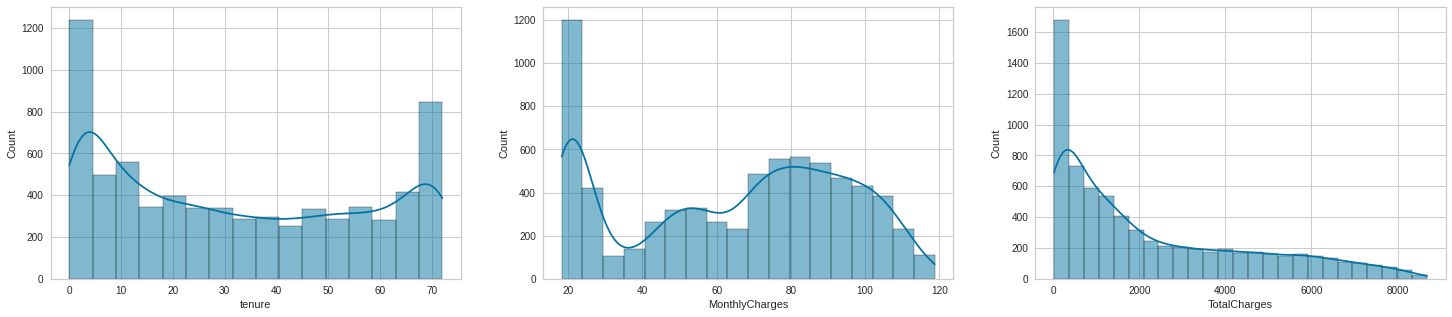

In [94]:
plot , ax = plt.subplots( 1,3 , figsize = (25 , 5))
g = sns.histplot(cust['tenure'] , kde = True , ax = ax[0])
g = sns.histplot(cust['MonthlyCharges'] , kde = True , ax = ax[1])
g = sns.histplot(cust['TotalCharges'] , kde = True , ax = ax[2])

**Observation :**

These numerical variables are not following a normal distribution. These distributions indicate there are different data distributions present in population data with separate and independent peaks.

**Action :**

**Data scaling**, As most of the algorithms assume the data to be normally (Gaussian) distributed we **Normalize** these features.

# Outliers

In [95]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
cust_dummies=pd.get_dummies(cust)
cust_dummies['tenure'] = mms.fit_transform(cust_dummies[['tenure']])
cust_dummies['MonthlyCharges'] = mms.fit_transform(cust_dummies[['MonthlyCharges']])
cust_dummies['TotalCharges'] = mms.fit_transform(cust_dummies[['TotalCharges']])

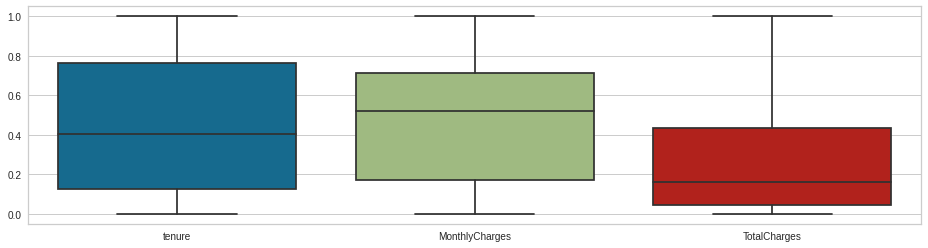

In [96]:
plt.figure(figsize=(16,4))
sns.boxplot(data=cust_dummies[['tenure','MonthlyCharges','TotalCharges']])

Observation : There are no values present beyond the upper and lower extremes of the Box plots (1.5 x Inter Quartile Range)

## Multicolinearity

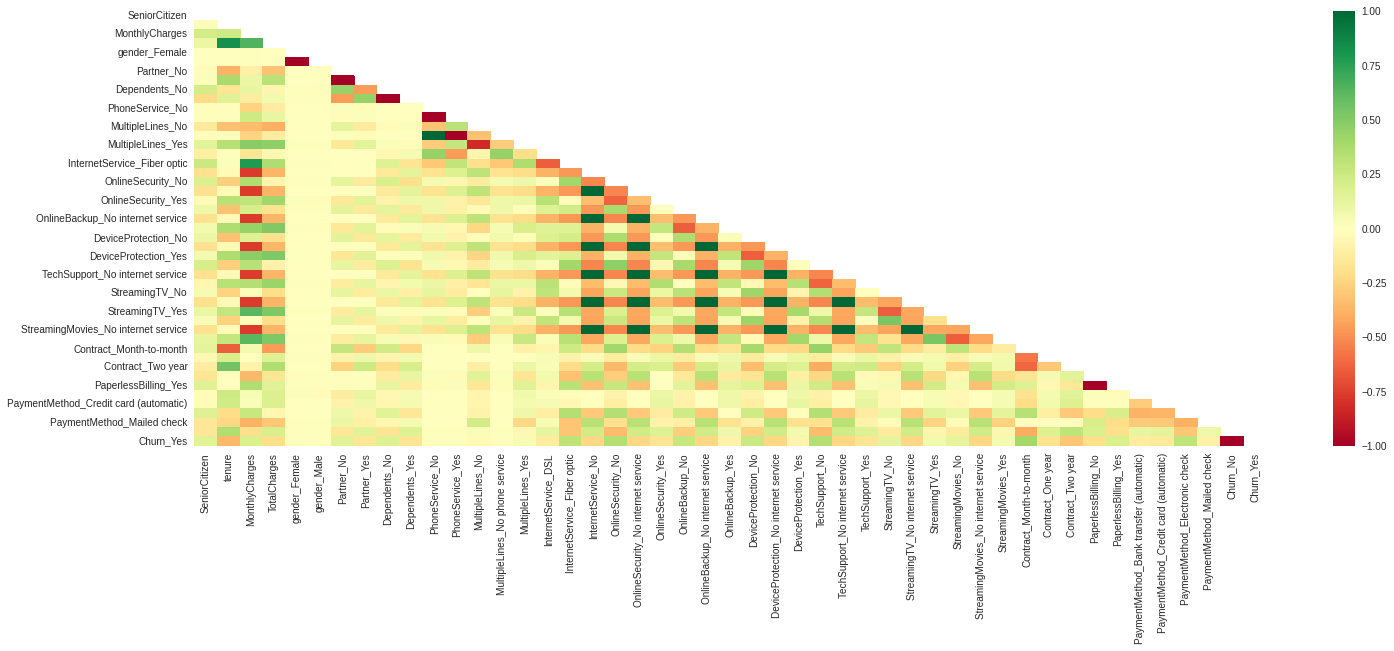

In [97]:
#the heat map of the correlation
plt.figure(figsize=(24,8))
corr = cust_dummies.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,mask=mask, cmap='RdYlGn')

**Observation :**

* We observe complete correlation between all the services having No Internet services and hence we will drop these variables.
* TotalCharges has a strong corelation with tenure and MonthlyCharges
* MonthlyCharges & TotalCharges are highly correlated with multiple phone services
* Partners and Dependents seems to be some what correlated

**Action :**

Dropping some of the highly correlated categorical variables.

#Binary Classification

**Target Label - Churn**
Here we need to know: “Is this customer going to leave us?” Yes or No? 


In [143]:
#importing classification
from pycaret.classification import *

## Distribution of Target Class

In [99]:
print("Customer Churn Rate(%):")
print(round(cust['Churn'].value_counts(normalize=True) * 100,2))

Customer Churn Rate(%):
No     73.46
Yes    26.54
Name: Churn, dtype: float64


## Setting up the Classifier

In [144]:
clf1 = setup(data = cust, 
             target = 'Churn',
             normalize=True,
             normalize_method='minmax',
             remove_multicollinearity=True,
             fold=5,
             fix_imbalance=True,
             feature_selection=True,
             silent = True)

,Description,Value
0,session_id,6387
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(7043, 20)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,16
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Churn',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strat...
                 Advanced_Feature_Selection_Classic(ml_usecase='classification',
                                                    n_jobs=-1,
                              

## Evaluation Metrics

Pycaret provides the following metrics used for comparing model performance in the compare_models() function:
* **Accuracy** is the fraction of correction predictions against the total prediction
    * Accuracy = Correct Predictions / Total Predictions
    
    
* **AUC** known as the Area Under the ROC Curve can be calculated and provides a single score to summarize the plot that can be used to compare models. A no skill classifier will have a score of 0.5, whereas a perfect classifier will have a score of 1.0.

* **Confusion Matrix** is a performance measurement for machine learning classification problem where output can be two or more classes. It is a table with 4 different combinations of predicted and actual values.

![image.png](attachment:695a380c-d7e9-40a9-86de-4ef5dbb04ed6.png)


* **Precision** summarizes the fraction of examples assigned the positive class that belong to the positive class.
    * Precision = TruePositive / (TruePositive + FalsePositive)
* **Recall** summarizes how well the positive class was predicted.
    * Recall = TruePositive / (TruePositive + FalseNegative)
* **F1 score** is the harmonic mean of Precision and recall, a single score that seeks to balance both concerns.
    * F-Measure = (2 * Precision * Recall) / (Precision + Recall)
* **Cohen’s Kappa Statistic** is used to measure the level of agreement between two raters or judges who each classify items into mutually exclusive categories.
    * kappa = (Observed agreement - chance agreement) / (1-chance agreement)

![image.png](attachment:a517765a-8a40-419d-bbca-9040e9ddd0bd.png)

* **MCC** produces a high score only if the prediction obtained good results in all of the four confusion matrix categories (true positives, false negatives, true negatives, and false positives), proportionally both to the size of positive elements and the size of negative elements in the dataset.
    
![image.png](attachment:e4d91181-e5fe-4eda-899b-c7c7043ea65c.png)

## Model Comparison & Evaluation
Searching for the best models

In [117]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7856,0.8264,0.5877,0.5950,0.5908,0.4457,0.4460,0.444
gbc,Gradient Boosting Classifier,0.7836,0.8410,0.6762,0.5774,0.6223,0.4721,0.4755,1.416
rf,Random Forest Classifier,0.7777,0.8143,0.5892,0.5772,0.5828,0.4314,0.4317,1.226
ada,Ada Boost Classifier,0.7663,0.8402,0.7423,0.5422,0.6262,0.4624,0.4748,0.522
et,Extra Trees Classifier,0.7586,0.7856,0.5062,0.5456,0.5247,0.3634,0.3641,1.278
lr,Logistic Regression,0.7444,0.8415,0.7938,0.5101,0.6209,0.4416,0.4665,0.798
svm,SVM - Linear Kernel,0.7418,0.0000,0.7092,0.5199,0.5861,0.4091,0.4318,0.188
ridge,Ridge Classifier,0.7400,0.0000,0.8023,0.5045,0.6193,0.4371,0.4645,0.112
lda,Linear Discriminant Analysis,0.7396,0.8400,0.8023,0.5040,0.6189,0.4364,0.4639,0.192
nb,Naive Bayes,0.7379,0.8270,0.7877,0.5021,0.6130,0.4293,0.4545,0.150


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=6727, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


**Observation**:

* Light Gradient Boosting Machine has the highest accuracy and is also drastically faster in predicting the churn customers.
* It is followed by Gradient Boosting Classifier and Random Forest classifier.

## Creating a model 
We will use Light GBM model here, as it is performs well and is computationally inexpensive and quick.

In [118]:
lgbm=create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7840,0.8115,0.5923,0.5900,0.5912,0.4444,0.4444
1,0.7718,0.8184,0.6038,0.5627,0.5826,0.4258,0.4263
2,0.7890,0.8304,0.5885,0.6024,0.5953,0.4527,0.4528
3,0.8043,0.8521,0.6269,0.6293,0.6281,0.4953,0.4953
4,0.7789,0.8195,0.5269,0.5905,0.5569,0.4102,0.4114
Mean,0.7856,0.8264,0.5877,0.5950,0.5908,0.4457,0.4460
Std,0.0109,0.0142,0.0332,0.0215,0.0229,0.0289,0.0285


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=6727, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


## Hyperparameter Tuning

In [119]:
tuned_model = tune_model(lgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7809,0.8236,0.6423,0.5759,0.6073,0.4560,0.4573
1,0.7769,0.8319,0.6538,0.5667,0.6071,0.4524,0.4547
2,0.7860,0.8423,0.6346,0.5872,0.6100,0.4628,0.4635
3,0.8124,0.8546,0.6577,0.6404,0.6490,0.5210,0.5210
4,0.7718,0.8312,0.5462,0.5703,0.5580,0.4043,0.4044
Mean,0.7856,0.8367,0.6269,0.5881,0.6063,0.4593,0.4602
Std,0.0142,0.0107,0.0412,0.0271,0.0289,0.0372,0.0370


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:LGBMClassifier(bagging_fraction=0.5, bagging_freq=1, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.5, max_depth=-1,
               min_child_samples=61, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=280, n_jobs=-1, num_leaves=6, objective=None,
               random_state=6727, reg_alpha=10, reg_lambda=1e-07, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


**Observation :** 
* By tuning the regularization parameters alpha and lambda, the F1 score has significantly improved.
* Increase in Number of estimators improved model performance. 

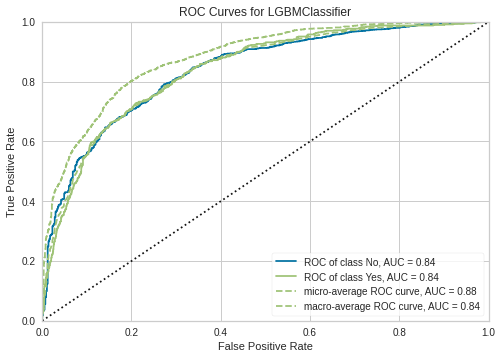

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [120]:
#Plotting Area under Curve
plot_model(estimator = tuned_model, plot = 'auc')

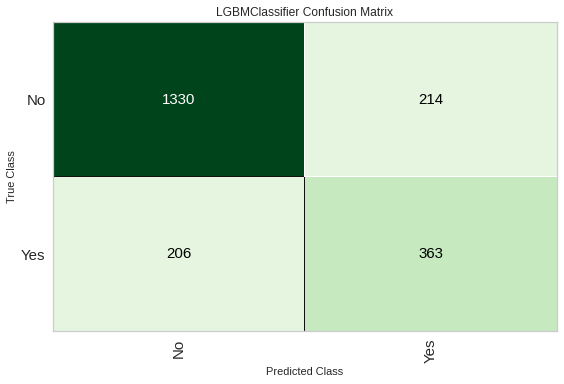

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [121]:
#Plotting the confusion Matrix
plot_model(estimator = tuned_model, plot = 'confusion_matrix')

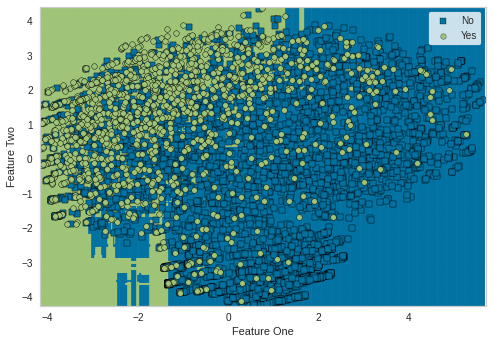

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [122]:
#plotting decision boundary
plot_model(estimator = tuned_model, plot = 'boundary', use_train_data = True)

**Observation:** 

We can see a great seperation with very few misclassifications.

## Feature Importance

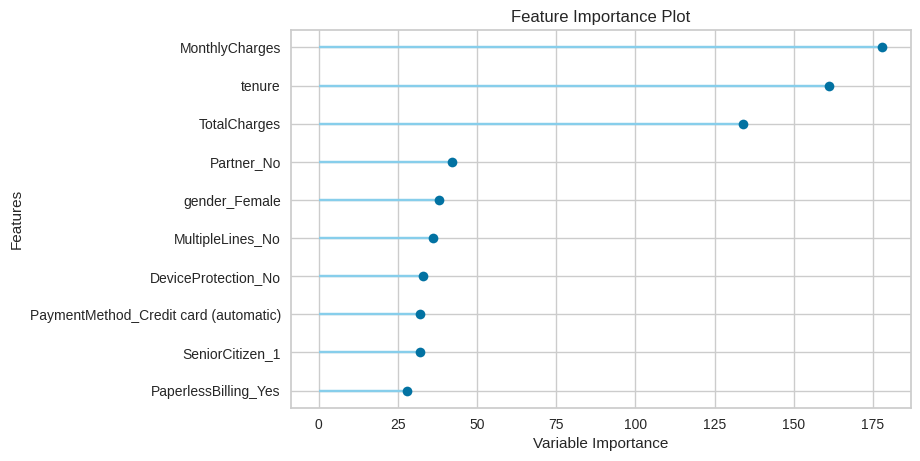

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [123]:
#Plotting Feature Importance
plot_model(estimator = tuned_model, plot = 'feature')

# Blending Multiple Models

In [145]:
#Creating Models
lightgbm  = create_model('lightgbm');       
svm  = create_model('svm');          
lr  = create_model('lr'); 

blend = blend_models(estimator_list=[lightgbm,svm,lr])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7688,0.0,0.7815,0.5553,0.6492,0.4840,0.4998
1,0.7353,0.0,0.7519,0.5113,0.6087,0.4195,0.4373
2,0.7546,0.0,0.7852,0.5354,0.6366,0.4612,0.4805
3,0.7870,0.0,0.7037,0.5938,0.6441,0.4937,0.4973
4,0.7454,0.0,0.7786,0.5249,0.6270,0.4447,0.4647
Mean,0.7582,0.0,0.7602,0.5441,0.6331,0.4606,0.4759
Std,0.0181,0.0,0.0306,0.0287,0.0143,0.0268,0.0231


INFO:logs:create_model_container: 4
INFO:logs:master_model_container: 4
INFO:logs:display_container: 5
INFO:logs:VotingClassifier(estimators=[('lightgbm',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=6387, reg_alpha=0.0,
                                             reg_lambda=0.0, silent='

**Observation:**

We can observe significantly high f1 score by blending multiple models.

## Answers to Model used for Binary Classification
* Is the relationship significant?

-> Yes, the relastionship between Tenure, Monthly Charges, Total Charges, Contract type significantly important for predicting churn.

---

* Are any model assumptions violated?

-> We have used the Pycaret library for the avoiding any model violation
1.   Normalized the numeric predictor variables
2.   Fix the Imbalance in Target Class.
3.   Adjust the train test split to ensure sufficient training and test data size
4.   Use 5 fold cross validation to eliminate any test set bias.
5.   Remove multicolinearity from the model.

---


* Is there any multicollinearity in the model?

-> Yes, multicolinearity exists in the data.
* We observe complete correlation between all the services having No Internet services and hence we will drop these variables.
* TotalCharges has a strong corelation with tenure and MonthlyCharges
* MonthlyCharges & TotalCharges are highly correlated with multiple phone services
* Partners and Dependents seems to be some what correlated

---

* In the multivariate models are predictor variables independent of all the other predictor variables?

-> In the data, predictor variables are depedent on each other.
We use remove_multicolinearity to eliminate the highly corelated predictor variables.

---

* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

-> The most important features are Tenure, Total Charges, Monthly Charges, Gender, Partner, Payment Method and services like Online Backup and Payment Method

We have exluded the insignificant ones by setting remove_perfect_colinearity, remove_multicolinearity and feature_selection to True.

---

* Does the model make sense?

-> Yes, the churn prediction model makes sense as it has this accuracy and are able to correctly classify and predictor the Customers that will churn.
We have very high number of true posetives and negatives and also can observe a clear boundary between the classes.

---

* Does regularization help?

-> Yes regularization using the alpha and lambda parameters increased the F1 score of the Light GBM model signficantly.

---

* Which independent variables are significant?

-> Tenure, Total Charges, Monthly Charges, Contract Type and other services like are important

---

* Which hyperparameters are important?

->The number of estimators, Bagging Fraction, Minimum Child Samples, regularization parameters alpha and lambda, learning-rate are important hyperparameters

# Multiclass Classification

Target Label: Contract 

Here we need to know: “Is this customer going to suscribe monthly, annually or for two years.

In [114]:
print("Distribution of Contract Types:")
print(round(cust['Contract'].value_counts(normalize=True) * 100,2))

Distribution of Contract Types:
Month-to-month    55.02
Two year          24.07
One year          20.91
Name: Contract, dtype: float64


In [126]:
clf1 = setup(data = cust, 
             target = 'Contract',
             normalize=True,
             normalize_method='minmax',
             remove_multicollinearity=True,
             fold=5,
             fix_imbalance=True,
             feature_selection=True,
             silent = True)

,Description,Value
0,session_id,2330
1,Target,Contract
2,Target Type,Multiclass
3,Label Encoded,"Month-to-month: 0, One year: 1, Two year: 2"
4,Original Data,"(7043, 20)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,16
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Contract',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_st...
                 Advanced_Feature_Selection_Classic(ml_usecase='classification',
                                                    n_jobs=-1,
                              

In [127]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7430,0.9060,0.6859,0.7545,0.7480,0.5728,0.5736,3.606
ada,Ada Boost Classifier,0.7331,0.8777,0.6876,0.7605,0.7439,0.5628,0.5661,0.474
lr,Logistic Regression,0.7329,0.9049,0.6933,0.7662,0.7454,0.5663,0.5709,1.276
svm,SVM - Linear Kernel,0.7286,0.0000,0.6479,0.7174,0.7112,0.5377,0.5467,0.260
ridge,Ridge Classifier,0.7284,0.0000,0.6394,0.7082,0.7074,0.5365,0.5450,0.106
lightgbm,Light Gradient Boosting Machine,0.7278,0.8979,0.6564,0.7276,0.7274,0.5415,0.5417,0.884
rf,Random Forest Classifier,0.7258,0.8928,0.6552,0.7279,0.7266,0.5384,0.5387,1.198
et,Extra Trees Classifier,0.7152,0.8793,0.6359,0.7104,0.7125,0.5163,0.5166,1.138
lda,Linear Discriminant Analysis,0.7075,0.8994,0.6816,0.7655,0.7270,0.5348,0.5452,0.136
nb,Naive Bayes,0.6781,0.8782,0.6426,0.7246,0.6925,0.4878,0.4956,0.108


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2330, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


**Observation:**

* Gradient Boosting Classifier is outperforming other models but is computationally expensive
* SVM with linear kernal also performs significantly well


## Create a Light GBM Model

In [128]:
lgbm=create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7363,0.9030,0.6642,0.7291,0.7320,0.5534,0.5540
1,0.7272,0.8927,0.6577,0.7256,0.7263,0.5392,0.5392
2,0.7495,0.9108,0.6771,0.7449,0.7469,0.5759,0.5762
3,0.7008,0.8902,0.6219,0.7062,0.7034,0.4986,0.4987
4,0.7252,0.8930,0.6614,0.7320,0.7283,0.5403,0.5405
Mean,0.7278,0.8979,0.6564,0.7276,0.7274,0.5415,0.5417
Std,0.0160,0.0078,0.0185,0.0125,0.0140,0.0252,0.0253


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=2330, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [129]:
tuned_model = tune_model(lgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7546,0.9117,0.6997,0.7627,0.7579,0.5920,0.5927
1,0.7394,0.9032,0.6797,0.7455,0.7421,0.5648,0.5652
2,0.7708,0.9186,0.7077,0.7715,0.7708,0.6152,0.6154
3,0.7292,0.8998,0.6693,0.7437,0.7357,0.5508,0.5517
4,0.7312,0.8987,0.6712,0.7425,0.7363,0.5524,0.5530
Mean,0.7450,0.9064,0.6855,0.7532,0.7486,0.5750,0.5756
Std,0.0157,0.0076,0.0155,0.0117,0.0137,0.0249,0.0248


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:LGBMClassifier(bagging_fraction=0.8, bagging_freq=0, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.6,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=100, min_child_weight=0.001,
               min_split_gain=0.6, n_estimators=160, n_jobs=-1, num_leaves=20,
               objective=None, random_state=2330, reg_alpha=1, reg_lambda=2,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


**Observation :**
* The regularization parameters alpha and beta have significantly improved the model.
* The tuned LGBM is outperforming the Gradient Boosting Classifier as well.

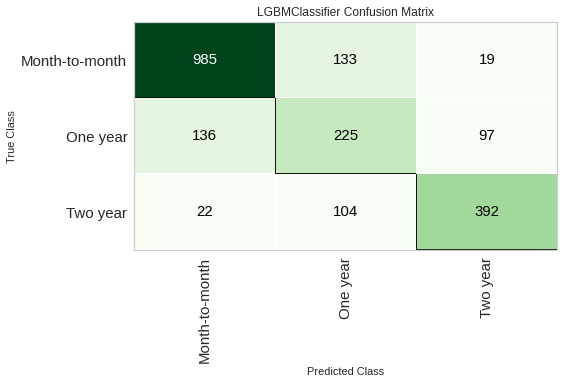

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [130]:
#Plotting the confusion Matrix
plot_model(estimator = tuned_model, plot = 'confusion_matrix')

**Observation :**

We can see a strong diagnol indicating good predictions.

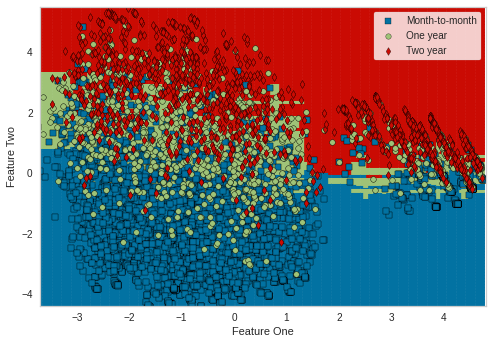

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [131]:
#plotting decision boundary
plot_model(estimator = tuned_model, plot = 'boundary', use_train_data = True)

**Observation :**
we can see a good seperation between classes with minimal mis-classifications

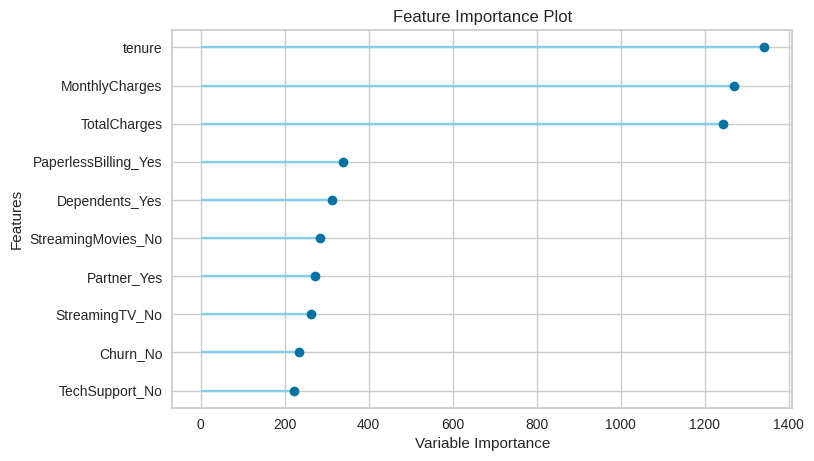

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [132]:
#Plotting Feature Importance
plot_model(estimator = tuned_model, plot = 'feature')

## Answers for model used for Multiclass Classification
* Is the relationship significant?

-> Yes, the relationship between Tenure, Monthly Charges and Total Charges is important in predicting Contract

---

* Are any model assumptions violated?

-> We have used the Pycaret library for the avoiding any model violation

1. Normalized the numeric predictor variables
2. Fix the Imbalance in Target Class.
3. Adjust the train test split to ensure sufficient training and test data size
4. Use 5 fold cross validation to eliminate any test set bias.
5. Remove multicolinearity from the model.

---

* Is there any multicollinearity in the model?

-> Yes, multicolinearity exists in the data.
1. We observe complete correlation between all the services having No Internet services and hence we will drop these variables.
2. TotalCharges has a strong corelation with tenure and MonthlyCharges
3. MonthlyCharges & TotalCharges are highly correlated with multiple phone services
4. Partners and Dependents seems to be some what correlated

---

* In the multivariate models are predictor variables independent of all the other predictor variables?

-> In the data, predictor variables are depedent on each other.
We use remove_multicolinearity to eliminate the highly corelated predictor variables

---

* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

-> The most important features are Tenure, Monthly Charges and Total Charges.

We have exluded the insignificant ones by setting remove_perfect_colinearity, remove_multicolinearity and feature_selection to True.

---

* Does the model make sense?

-> Yes, the predictions of contract type makes sense and we can see a clear boundary while classifying these customers.

---

* Does regularization help?

-> Yes regularization with the alpha and lambda parameters significantly improved the model performance by increasing f1 score.

---

* Which independent variables are significant?

-> Tenure, Total Charges, Monthly Charges are signicant independent variables.

---

* Which hyperparameters are important?

->The bagging fraction, learning rate, number of estimators, regularization parameters alpha and lambda are important hyperparameters

# Regression
**Target: Monthly Charges**

We would predict the cost of monthly charges user must pay based on the list of services, demographics and other datasets.

In [134]:
from pycaret.regression import *

In [135]:
reg = setup(data = cust, 
            target = 'MonthlyCharges',
            train_size=0.8,
            normalize=True,
            normalize_method='minmax',
            remove_multicollinearity=True,
            fold=5,
            transform_target=True,
            feature_selection=True,
            silent = True)

,Description,Value
0,session_id,4620
1,Target,MonthlyCharges
2,Original Data,"(7043, 20)"
3,Missing Values,True
4,Numeric Features,2
5,Categorical Features,17
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(5634, 31)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='MonthlyCharges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_...
                 Advanced_Feature_Selection_Classic(ml_usecase='regression',
                                                    n_jobs=-1,
                                  

In [136]:
best_model=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.8094,1.1117,1.0542,0.9988,0.0189,0.0147,0.684
ridge,Ridge Regression,0.8100,1.1112,1.0540,0.9988,0.0189,0.0148,0.032
br,Bayesian Ridge,0.8093,1.1108,1.0538,0.9988,0.0189,0.0147,0.042
huber,Huber Regressor,0.8083,1.1118,1.0543,0.9988,0.0188,0.0147,0.152
lightgbm,Light Gradient Boosting Machine,0.8366,1.2643,1.1238,0.9986,0.0188,0.0146,0.306
gbr,Gradient Boosting Regressor,0.9303,1.5210,1.2331,0.9983,0.0214,0.0166,0.522
par,Passive Aggressive Regressor,1.0918,1.8195,1.3475,0.9980,0.0314,0.0231,0.038
rf,Random Forest Regressor,0.9911,2.0197,1.4187,0.9978,0.0233,0.0169,1.598
et,Extra Trees Regressor,1.0598,2.2133,1.4874,0.9976,0.0252,0.0184,1.508
dt,Decision Tree Regressor,1.2910,3.6976,1.9170,0.9959,0.0318,0.0220,0.058


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 2
INFO:logs:PowerTransformedTargetRegressor(copy_X=True, fit_intercept=True, n_jobs=-1,
                                normalize=False,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                regressor=LinearRegression(copy_X=True,
                                                           fit_intercept=True,
                                                           n_jobs=-1,
                                                           normalize=False))
INFO:logs:compare_models() succesfully completed......................................


**Observation:**
* Here intrestingly, a simple Linear Regression model is outperforming most of the models.

Tuning the hyperparameters.

In [137]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.8548,1.2836,1.1330,0.9986,0.0187,0.0147
1,0.8053,1.1725,1.0828,0.9987,0.0184,0.0142
2,0.8808,1.3686,1.1699,0.9985,0.0195,0.0152
3,0.8389,1.3235,1.1504,0.9985,0.0195,0.0147
4,0.8031,1.1732,1.0832,0.9987,0.0181,0.0141
Mean,0.8366,1.2643,1.1238,0.9986,0.0188,0.0146
Std,0.0297,0.0794,0.0354,0.0001,0.0006,0.0004


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 3
INFO:logs:PowerTransformedTargetRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                random_state=4...
                                                        importance_type='split',
                                                        learning_rate=0.1,
                                                        max_depth=-1,
                                  

In [138]:
tuned_model = tune_model(lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.0519,2.0398,1.4282,0.9977,0.0242,0.0185
1,1.0121,1.7784,1.3336,0.9981,0.0226,0.0178
2,1.0581,1.9346,1.3909,0.9979,0.0237,0.0186
3,1.0755,1.9959,1.4128,0.9978,0.0228,0.0183
4,1.0431,1.9271,1.3882,0.9978,0.0231,0.0182
Mean,1.0481,1.9352,1.3907,0.9979,0.0233,0.0183
Std,0.0209,0.0886,0.0321,0.0001,0.0006,0.0003


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 4
INFO:logs:PowerTransformedTargetRegressor(bagging_fraction=0.4, bagging_freq=2,
                                boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, feature_fraction=0.9,
                                importance_type='split', learning_rate=0.4,
                                max_depth=-1, min_child_samples=71,
                                min_child_weight=0.001, min_split_gain=0,
                                n_estimators=90, n_jobs=-1, num_leaves=50,
                                objective=None,
                                power_transformer_method='box-...
                                                        importance_type='split',
                                                        learning_rate=0.4,
                                                        max_depth=-1,
                                 

**Observation:**
* Tuning the model didn't really improve the predictions.

Let's plot the residuals of the Linear Regression Model

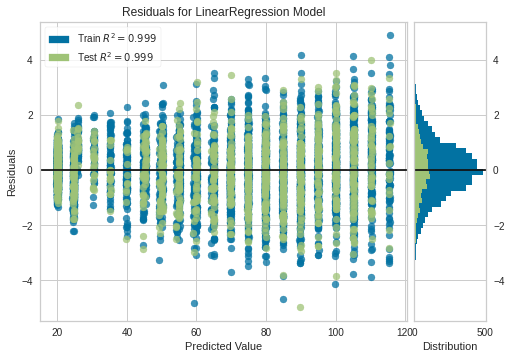

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [140]:
plot_model(estimator = best_model, plot = 'residuals')

**Observation :** The residuals are evenly distributed.

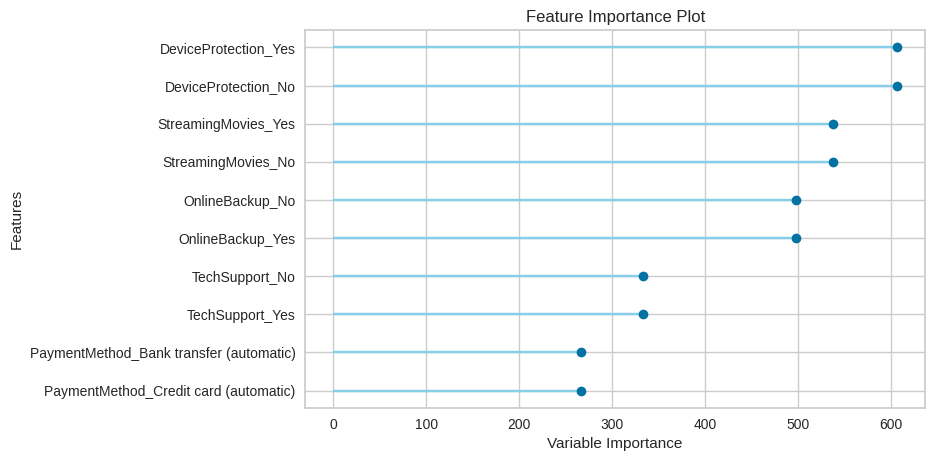

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [141]:
plot_model(estimator = best_model, plot = 'feature')

## Answers for Regression Model
* Is the relationship significant?

-> Yes, we can accurately predict the Monthly Charges with minimum deviations with the services the users has opted for.

---

* Are any model assumptions violated?

-> We have used the Pycaret library for the avoiding any model violation
1.   Normalized the numeric predictor variables
2.   Transformed the target variable using Box Cox transformation.
3.   Adjust the train test split to ensure sufficient training and test data size
4.   Use 5 fold cross validation to eliminate any test set bias.
5.   Remove multicolinearity from the model.



---



* Is there any multicollinearity in the model?

-> Yes, multicolinearity exists in the data.



---



* In the multivariate models are predictor variables independent of all the other predictor variables?

-> In the data, predictor variables are depedent on each other.
We use remove_multicolinearity to eliminate the highly corelated predictor variables



---



* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

-> The most significant predictor variables are as follows:
1. Device Protection
2. Online Backup
3. StreamingMovies
4. Tech Support
5. Payment Method.

->  To eliminate insignificant features from the model we set remove perfect colinearity, remove multicolinearity and feature selection to True while setting up the Pycaret model. 

---

* Does the model make sense?

-> Yes, the churn prediction model makes sense as it has this accuracy and are able to correctly classify and predictor the Customers that will churn.


---


* Does regularization help?

-> No, while tuning the hyperparameters, the regularization didn't have any significant impact on improving the predictions as no change is observed in mae, rmse or other metrics.

---


* Which independent variables are significant?

-> Device Protection, Online Backup, StreamingTV, Online Security, Tech Support, Multiple Lines are important independent variable for predicting the Monthly Charges.

---


* Which hyperparameters are important?

->The number of estimators, bagging fraction, bagging frequency, lambda are important hyperparameters

# Conclusion:

* PyCaret provides several **data preprocessing and preparation** exercises like imputing missing values, handling outliers, standardizing/normalizing variables, one-hot/ordinal/cardinal encoding, target imbalance and feature selection.
* It provides a robust framework not only to **build multiple ML models** but also evaluate them using a wide set of metrics.
* It offers visuals/plots to **evaluate the model performance** as well as interpret the models.
* Additionally, we can also perform **hyperparameter tuning** and **blend multiple models** to attain highly accuracte models.

# License

**References*** 
* https://pycaret.org
* https://pycaret.readthedocs.io/en/stable/api/classification.html

Copyright (c) 2022 chakraborty-arnab

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.